In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiments = SentimentIntensityAnalyzer()

In [5]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Roshan\AppData\Roaming\nltk_data...


True

In [7]:
data = pd.read_csv("Amazon.txt", delimiter='\t')

In [8]:
print(data.head())

   rating       date         variation  \
0       5  31-Jul-18  Charcoal Fabric    
1       5  31-Jul-18  Charcoal Fabric    
2       4  31-Jul-18    Walnut Finish    
3       5  31-Jul-18  Charcoal Fabric    
4       5  31-Jul-18  Charcoal Fabric    

                                    verified_reviews  feedback  
0                                      Love my Echo!         1  
1                                          Loved it!         1  
2  Sometimes while playing a game, you can answer...         1  
3  I have had a lot of fun with this thing. My 4 ...         1  
4                                              Music         1  


In [9]:
ratings = data["rating"].value_counts()
number = ratings.index
quantity = ratings.values

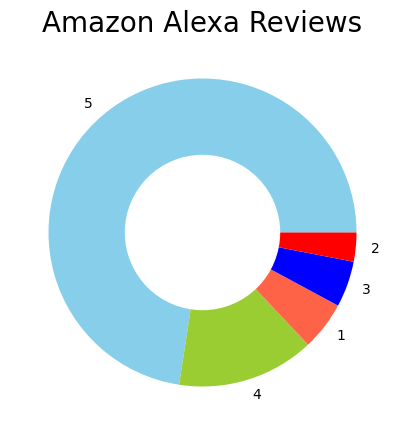

In [10]:
custom_colors = ["skyblue", "yellowgreen", 'tomato', "blue", "red"]
plt.figure(figsize=(5, 5))
plt.pie(quantity, labels=number, colors=custom_colors)
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Amazon Alexa Reviews", fontsize=20)
plt.show()

In [12]:
# Convert all reviews to string and fill NaN with an empty string
data["verified_reviews"] = data["verified_reviews"].astype(str)

In [13]:
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["verified_reviews"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["verified_reviews"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["verified_reviews"]]

In [14]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z=sum(data["Neutral"])

In [15]:
def sentiment_score(a,b,c):
    if(a>b) and (a>c):
        print("Positive")
    elif(b>a) and (b>c):
        print ("Negative")
    else:
        print("Neutral")

In [18]:
sentiment_score(x,y,z)

Neutral


In [19]:
data["verified_reviews"] = data["verified_reviews"].astype(str)

In [20]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

data["Positive"] = data["verified_reviews"].apply(lambda x: sia.polarity_scores(x)["pos"])
data["Negative"] = data["verified_reviews"].apply(lambda x: sia.polarity_scores(x)["neg"])
data["Neutral"]  = data["verified_reviews"].apply(lambda x: sia.polarity_scores(x)["neu"])
data["Compound"] = data["verified_reviews"].apply(lambda x: sia.polarity_scores(x)["compound"])

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Roshan\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [21]:
def get_sentiment_label(score):
    if score >= 0.05:
        return "Positive"
    elif score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

data["Sentiment_Label"] = data["Compound"].apply(get_sentiment_label)

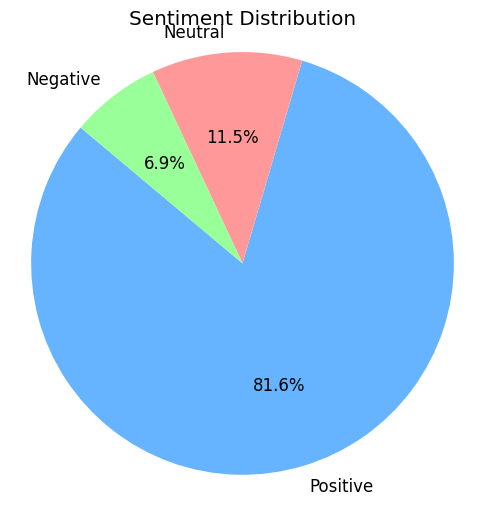

In [22]:
import matplotlib.pyplot as plt

sentiment_counts = data["Sentiment_Label"].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff', '#ff9999', '#99ff99'])
plt.title("Sentiment Distribution")
plt.axis('equal')
plt.show()

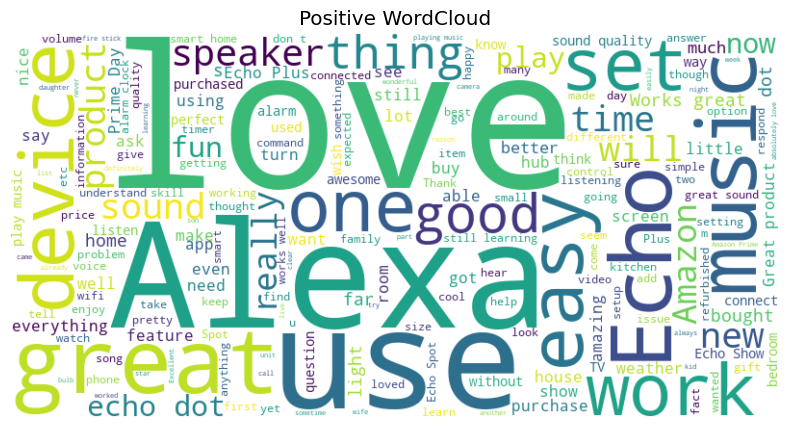

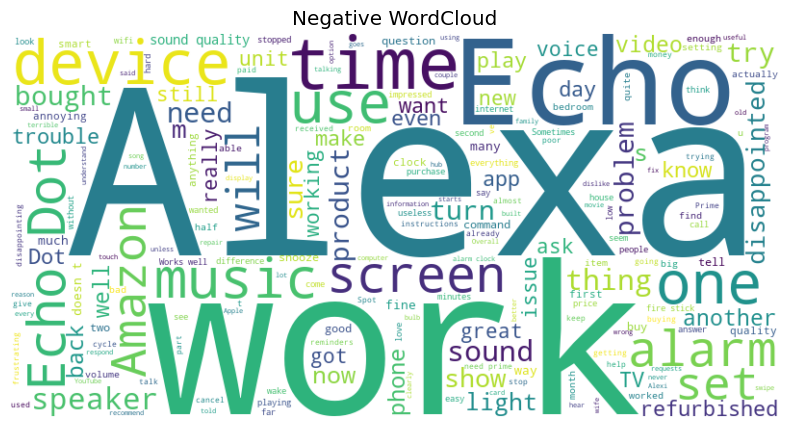

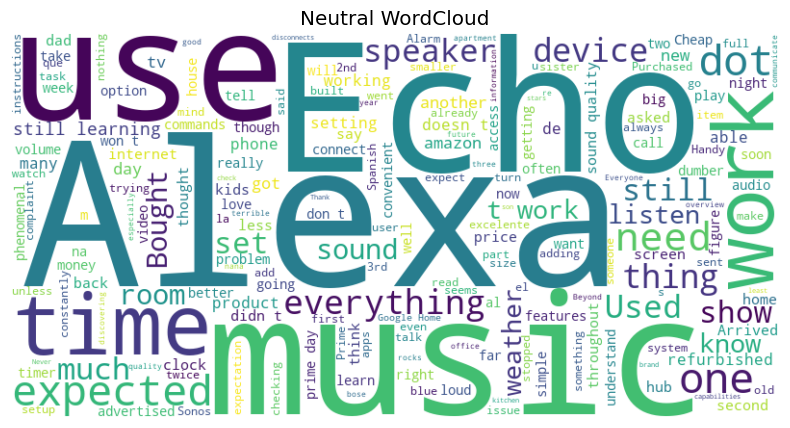

In [25]:
from wordcloud import WordCloud

def plot_wordcloud(sentiment):
    text = " ".join(data[data["Sentiment_Label"] == sentiment]["verified_reviews"])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"{sentiment} WordCloud")
    plt.show()

plot_wordcloud("Positive")
plot_wordcloud("Negative")
plot_wordcloud("Neutral")

In [26]:
for label in ["Positive", "Negative", "Neutral"]:
    example = data[data["Sentiment_Label"] == label]["verified_reviews"].sample(1).values[0]
    print(f"\n👉 {label} Example:\n{example}\n")



👉 Positive Example:
It seems easy to stump Alexa with rather simple questions that are easily googled with the correct answer.  We admit that we have not explored all that's available through the Echo.  One irritating issue is that Alexa cannot answer help questions concerning how to use the system, rather it refers you to the Alexa app or help via a computer.  It was very simple to setup and use and we continue to learn how this tool can become more useful.


👉 Negative Example:
HANDY AS HELL 10/10 RECOMMEND


👉 Neutral Example:
 

